# Q4: Do Text Processing with provided text
Text originally from *Roma : the novel of ancient Rome / Steven Saylor.* The passage is available publicly [here](http://catdir.loc.gov/catdir/enhancements/fy0711/2006051179-s.html). 

#####  import libraries and pre-cleaning
Here we are going to install, import and read the passage saved as a txt file

In [ ]:
!pip install -r requirements.txt

In [2]:
import pandas as pd
import string as st
import re
import nltk
import numpy as np

In [63]:
text = open('./text.txt','r')
text = text.read()
text

'Chapter One\nA Stop on the Salt Route\n1000 B.C.\nAs they rounded a bend in the path that ran beside the river, Lara recognized the silhouette of a fig tree atop a nearby hill. The weather was hot and the days were long. The fig tree was in full leaf, but not yet bearing fruit.\nSoon Lara spotted other landmarks—an outcropping of limestone beside the path that had a silhouette like a man’s face, a marshy spot beside the river where the waterfowl were easily startled, a tall tree that looked like a man with his arms upraised. They were drawing near to the place where there was an island in the river. The island was a good spot to make camp. They would sleep on the island tonight.\nLara had been back and forth along the river path many times in her short life. Her people had not created the path—it had always been there, like the river—but their deerskin-shod feet and the wooden wheels of their handcarts kept the path well worn. Lara’s people were salt traders, and their livelihood took

Here, we want to remove punctuation. Punctuations provided by string library in Python

In [64]:
st.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [65]:
# remove punctuations
def remove_punctuations(inp):
  punct = st.punctuation
  #print(inp)
  inp = re.sub(r'&quot;', '', inp)
  inp = re.sub(r'.hack//', '', inp)
  inp = re.sub(r'&#039;', '', inp)
  inp = re.sub(r'A&#039;s', '', inp)
  inp = re.sub(r'I&#039;', 'I\'', inp)
  inp = re.sub(r'&amp;', 'and', inp)
  for character in st.punctuation:
    inp = inp.replace(character, '')
  inp = inp.replace('\n',' ')
  inp = inp.replace('’s','')
  inp = inp.replace('“','')
  inp = inp.replace('”','')
  return inp

Using replace, and some regex, we're able to remove the punctuations. We also lower the caps, hence make it easier to process

In [66]:
text = remove_punctuations(text).lower()
text

'chapter one a stop on the salt route 1000 bc as they rounded a bend in the path that ran beside the river lara recognized the silhouette of a fig tree atop a nearby hill the weather was hot and the days were long the fig tree was in full leaf but not yet bearing fruit soon lara spotted other landmarks—an outcropping of limestone beside the path that had a silhouette like a man face a marshy spot beside the river where the waterfowl were easily startled a tall tree that looked like a man with his arms upraised they were drawing near to the place where there was an island in the river the island was a good spot to make camp they would sleep on the island tonight lara had been back and forth along the river path many times in her short life her people had not created the path—it had always been there like the river—but their deerskinshod feet and the wooden wheels of their handcarts kept the path well worn lara people were salt traders and their livelihood took them on a continual journe

##### Step 1: Tokenizing
Tokenizing is a step when we 'token' (assign a number to) words. We tokenize words so the computer (which understands numbers better) could process each word easier. We are using NLTK as its also provide us with tokenizer for English languange.

In [68]:
nltk.download('punkt')
tokenized = nltk.word_tokenize(text)
tokenized

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['chapter',
 'one',
 'a',
 'stop',
 'on',
 'the',
 'salt',
 'route',
 '1000',
 'bc',
 'as',
 'they',
 'rounded',
 'a',
 'bend',
 'in',
 'the',
 'path',
 'that',
 'ran',
 'beside',
 'the',
 'river',
 'lara',
 'recognized',
 'the',
 'silhouette',
 'of',
 'a',
 'fig',
 'tree',
 'atop',
 'a',
 'nearby',
 'hill',
 'the',
 'weather',
 'was',
 'hot',
 'and',
 'the',
 'days',
 'were',
 'long',
 'the',
 'fig',
 'tree',
 'was',
 'in',
 'full',
 'leaf',
 'but',
 'not',
 'yet',
 'bearing',
 'fruit',
 'soon',
 'lara',
 'spotted',
 'other',
 'landmarks—an',
 'outcropping',
 'of',
 'limestone',
 'beside',
 'the',
 'path',
 'that',
 'had',
 'a',
 'silhouette',
 'like',
 'a',
 'man',
 'face',
 'a',
 'marshy',
 'spot',
 'beside',
 'the',
 'river',
 'where',
 'the',
 'waterfowl',
 'were',
 'easily',
 'startled',
 'a',
 'tall',
 'tree',
 'that',
 'looked',
 'like',
 'a',
 'man',
 'with',
 'his',
 'arms',
 'upraised',
 'they',
 'were',
 'drawing',
 'near',
 'to',
 'the',
 'place',
 'where',
 'there',
 'was

In [69]:
len(tokenized)

1966

Okay! We have 1966 words got tokenized

##### Step 2: Remove stopwords
Stopwords is a collection of words that has less meaning. Each language has their own stopwords. By removing stopwords, prevents us to processing less meaning yet frequenty seen words. Here, we are using English language stopwords provided by NLTK library.

In [70]:
#stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
stop

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [71]:
#remove stopwords
def remove_stopwords(text):
    return [word for word in text if word not in stop]

print(remove_stopwords(tokenized))
tokenized = remove_stopwords(tokenized)

['chapter', 'one', 'stop', 'salt', 'route', '1000', 'bc', 'rounded', 'bend', 'path', 'ran', 'beside', 'river', 'lara', 'recognized', 'silhouette', 'fig', 'tree', 'atop', 'nearby', 'hill', 'weather', 'hot', 'days', 'long', 'fig', 'tree', 'full', 'leaf', 'yet', 'bearing', 'fruit', 'soon', 'lara', 'spotted', 'landmarks—an', 'outcropping', 'limestone', 'beside', 'path', 'silhouette', 'like', 'man', 'face', 'marshy', 'spot', 'beside', 'river', 'waterfowl', 'easily', 'startled', 'tall', 'tree', 'looked', 'like', 'man', 'arms', 'upraised', 'drawing', 'near', 'place', 'island', 'river', 'island', 'good', 'spot', 'make', 'camp', 'would', 'sleep', 'island', 'tonight', 'lara', 'back', 'forth', 'along', 'river', 'path', 'many', 'times', 'short', 'life', 'people', 'created', 'path—it', 'always', 'like', 'river—but', 'deerskinshod', 'feet', 'wooden', 'wheels', 'handcarts', 'kept', 'path', 'well', 'worn', 'lara', 'people', 'salt', 'traders', 'livelihood', 'took', 'continual', 'journey', 'mouth', 'riv

As we can see, some words got removed!

In [72]:
len(tokenized)

1035

then we count each word appearance

In [73]:
token_series = pd.Series(tokenized)
token_series.value_counts()

lara         27
river        25
island       17
larth        17
man          14
             ..
giants        1
images        1
conjuring     1
lay           1
perfect       1
Length: 626, dtype: int64

##### Step 3: Stemming:
Stemming converts tokenned words into their root form. For example from 'standing' to 'stand'. We stem each token so we simplify (once again) the words to be processed. Here we use PorterStemmer function from NLTK library.

In [74]:
#stemming, to convert tokens to their root form
from nltk import PorterStemmer
ps = PorterStemmer()
stemmed_token = [ps.stem(word) for word in token_series]
stemmed_token

['chapter',
 'one',
 'stop',
 'salt',
 'rout',
 '1000',
 'bc',
 'round',
 'bend',
 'path',
 'ran',
 'besid',
 'river',
 'lara',
 'recogn',
 'silhouett',
 'fig',
 'tree',
 'atop',
 'nearbi',
 'hill',
 'weather',
 'hot',
 'day',
 'long',
 'fig',
 'tree',
 'full',
 'leaf',
 'yet',
 'bear',
 'fruit',
 'soon',
 'lara',
 'spot',
 'landmarks—an',
 'outcrop',
 'limeston',
 'besid',
 'path',
 'silhouett',
 'like',
 'man',
 'face',
 'marshi',
 'spot',
 'besid',
 'river',
 'waterfowl',
 'easili',
 'startl',
 'tall',
 'tree',
 'look',
 'like',
 'man',
 'arm',
 'uprais',
 'draw',
 'near',
 'place',
 'island',
 'river',
 'island',
 'good',
 'spot',
 'make',
 'camp',
 'would',
 'sleep',
 'island',
 'tonight',
 'lara',
 'back',
 'forth',
 'along',
 'river',
 'path',
 'mani',
 'time',
 'short',
 'life',
 'peopl',
 'creat',
 'path—it',
 'alway',
 'like',
 'river—but',
 'deerskinshod',
 'feet',
 'wooden',
 'wheel',
 'handcart',
 'kept',
 'path',
 'well',
 'worn',
 'lara',
 'peopl',
 'salt',
 'trader',
 '

Yep, all the tokens transformed into their root form

##### Step 4: Lemmatization:
Lemmatization converts word to its dictionary base form but takes grammar and vocab into considerations. Here is the main difference of Lemmatization from Stemming. Stemming only takes the root without grammatical and vocabulary consideration. These techniques are really popular when processing text in English.

In [75]:
#lemmatization converts word to its dictionary base form, takes grammar and vocab into considerations
from nltk import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lem = WordNetLemmatizer()
lemmatized = [lem.lemmatize(x) for x in token_series]
lemmatized

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['chapter',
 'one',
 'stop',
 'salt',
 'route',
 '1000',
 'bc',
 'rounded',
 'bend',
 'path',
 'ran',
 'beside',
 'river',
 'lara',
 'recognized',
 'silhouette',
 'fig',
 'tree',
 'atop',
 'nearby',
 'hill',
 'weather',
 'hot',
 'day',
 'long',
 'fig',
 'tree',
 'full',
 'leaf',
 'yet',
 'bearing',
 'fruit',
 'soon',
 'lara',
 'spotted',
 'landmarks—an',
 'outcropping',
 'limestone',
 'beside',
 'path',
 'silhouette',
 'like',
 'man',
 'face',
 'marshy',
 'spot',
 'beside',
 'river',
 'waterfowl',
 'easily',
 'startled',
 'tall',
 'tree',
 'looked',
 'like',
 'man',
 'arm',
 'upraised',
 'drawing',
 'near',
 'place',
 'island',
 'river',
 'island',
 'good',
 'spot',
 'make',
 'camp',
 'would',
 'sleep',
 'island',
 'tonight',
 'lara',
 'back',
 'forth',
 'along',
 'river',
 'path',
 'many',
 'time',
 'short',
 'life',
 'people',
 'created',
 'path—it',
 'always',
 'like',
 'river—but',
 'deerskinshod',
 'foot',
 'wooden',
 'wheel',
 'handcart',
 'kept',
 'path',
 'well',
 'worn',
 'lar

##### Optional: Find most common word pairing:
This step helps us to identify the most common two words to be paired. For another passage this could be "sun" and "shines", or "back" and "forth". This adds up to the analysis using BigramCollocationFinder in NLTK's collocations.

In [78]:
#find top 2 combinations
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures as bigram_measure
COUPLES = 10

bigram = BigramCollocationFinder.from_words(token_series)
for pairs in bigram.nbest(bigram_measure.likelihood_ratio, COUPLES):
  print(" + ".join(pairs))

fig + tree
lara + people
sunrise + side
back + forth
salt + traders
silhouette + fig
salt + beds
said + lara
never + seen
larth + heard


##### Create word clouds
Word clouds will help us visualise most used word and helps us a lot in the analysis.

first, we reconstruct all lemmatized tokens into a passage again

In [80]:
processed_text = " ".join([word for word in lemmatized])
processed_text

'chapter one stop salt route 1000 bc rounded bend path ran beside river lara recognized silhouette fig tree atop nearby hill weather hot day long fig tree full leaf yet bearing fruit soon lara spotted landmarks—an outcropping limestone beside path silhouette like man face marshy spot beside river waterfowl easily startled tall tree looked like man arm upraised drawing near place island river island good spot make camp would sleep island tonight lara back forth along river path many time short life people created path—it always like river—but deerskinshod foot wooden wheel handcart kept path well worn lara people salt trader livelihood took continual journey mouth river little group half dozen intermingled family gathered salt great salt bed beside sea groomed sifted salt loaded handcart cart full group would stay behind taking shelter amid rock simple leantos band fifteen heartier member set path ran alongside river precious cargo salt traveler crossed coastal lowland traveled toward m

then, using wordcloud and matplotlib library, create wordcloud visualisation!

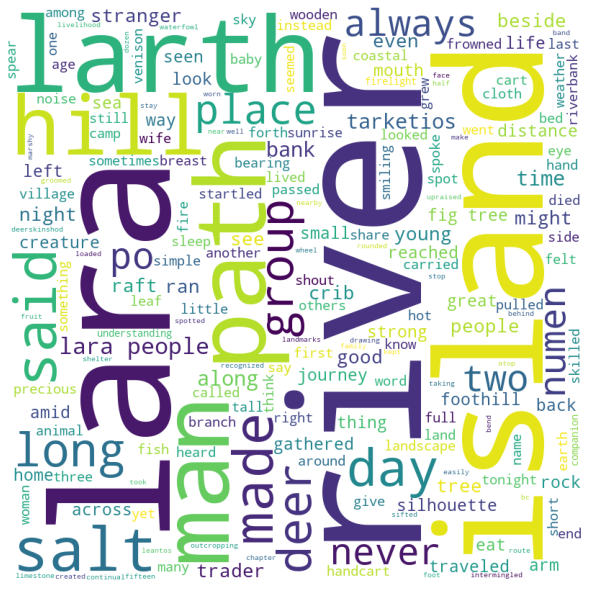

In [82]:
#word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(processed_text)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()